<div style="text-align: center;">
    <h1>Seoul Bike Sharing Predictive Model </h1>
</div>

![Your Image](https://c0.wallpaperflare.com/preview/990/405/199/south-korea-seoul-yellow-korean.jpg)


In [457]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [458]:
df = pd.read_pickle('seoul_bike_sharing_pickle')

In [459]:
df.dtypes

Rented Bike Count             int64
Hour                          int64
Temperature(°C)             float64
Humidity(%)                 float64
Wind speed (m/s)            float64
Visibility (10m)              int64
Solar Radiation (MJ/m2)     float64
Rainfall(mm)                float64
Snowfall (cm)               float64
Seasons                    category
Holiday                    category
Functioning Day            category
year                          int32
month                         int32
day                           int32
dtype: object

### Data Preprocessing

### Feature Transformation

* The distributions are not normal so will use power transformation to make then normal.
* The PowerTransformer supports two types of power transformations: the Yeo-Johnson transformation and the Box-Cox transformation.
* Yeo-Johnson Transformation handles data with zero and negative values by adding a shift parameter to make the data positive.

In [460]:
df.isnull().sum()

Rented Bike Count          0
Hour                       0
Temperature(°C)            0
Humidity(%)                0
Wind speed (m/s)           0
Visibility (10m)           0
Solar Radiation (MJ/m2)    0
Rainfall(mm)               0
Snowfall (cm)              0
Seasons                    0
Holiday                    0
Functioning Day            0
year                       0
month                      0
day                        0
dtype: int64

In [461]:
def conti_plots(data, columns):
    num_cols = len(columns)
    num_rows = (num_cols + 1) // 2  # Ensure that there is at least one row
    fig, axes = plt.subplots(num_rows, 2, figsize=(15, num_rows * 5))  # Adjust figsize as needed

    for i, column in enumerate(columns):
        row = i // 2
        col = i % 2

        maxi = round(data[column].max(), 2)
        mini = round(data[column].min(), 2)
        rani = round(maxi - mini, 2)
        meani = round(data[column].mean(), 2)
        mediani = round(data[column].median(), 2)
        std_dev = round(data[column].std(), 2)
        skewi = round(data[column].skew(), 2)
        kurt = round(data[column].kurtosis(), 2)

        points = np.array([round(meani - std_dev, 2), round(meani + std_dev, 2)])

        # Use axes[row, col] to select the appropriate subplot
        axes[row, col].set_title(f'{column}')
        sns.kdeplot(x=data[column], fill=True, ax=axes[row, col])
    
        sns.scatterplot(x=[mini, maxi], y=[0, 0], color='orange', label=f"min&max={mini}&{maxi}", ax=axes[row, col])
        sns.scatterplot(x=[meani], y=[0], color='red', label=f"mean={meani}", ax=axes[row, col])
        sns.scatterplot(x=[mediani], y=[0], color='blue', label=f"median={mediani}", ax=axes[row, col])
        axes[row, col].set_xlabel(f'{column}', fontsize=15)
        axes[row, col].set_ylabel('density')
        axes[row, col].set_title(f'within 1 std_dev={points[0]} to {points[1]}; kurtosis={kurt};\n skew = {skewi}; range = {rani}')

    plt.tight_layout()
    plt.show()

In [462]:
conti_data = list(df.select_dtypes(include=['float64','int64']).columns)

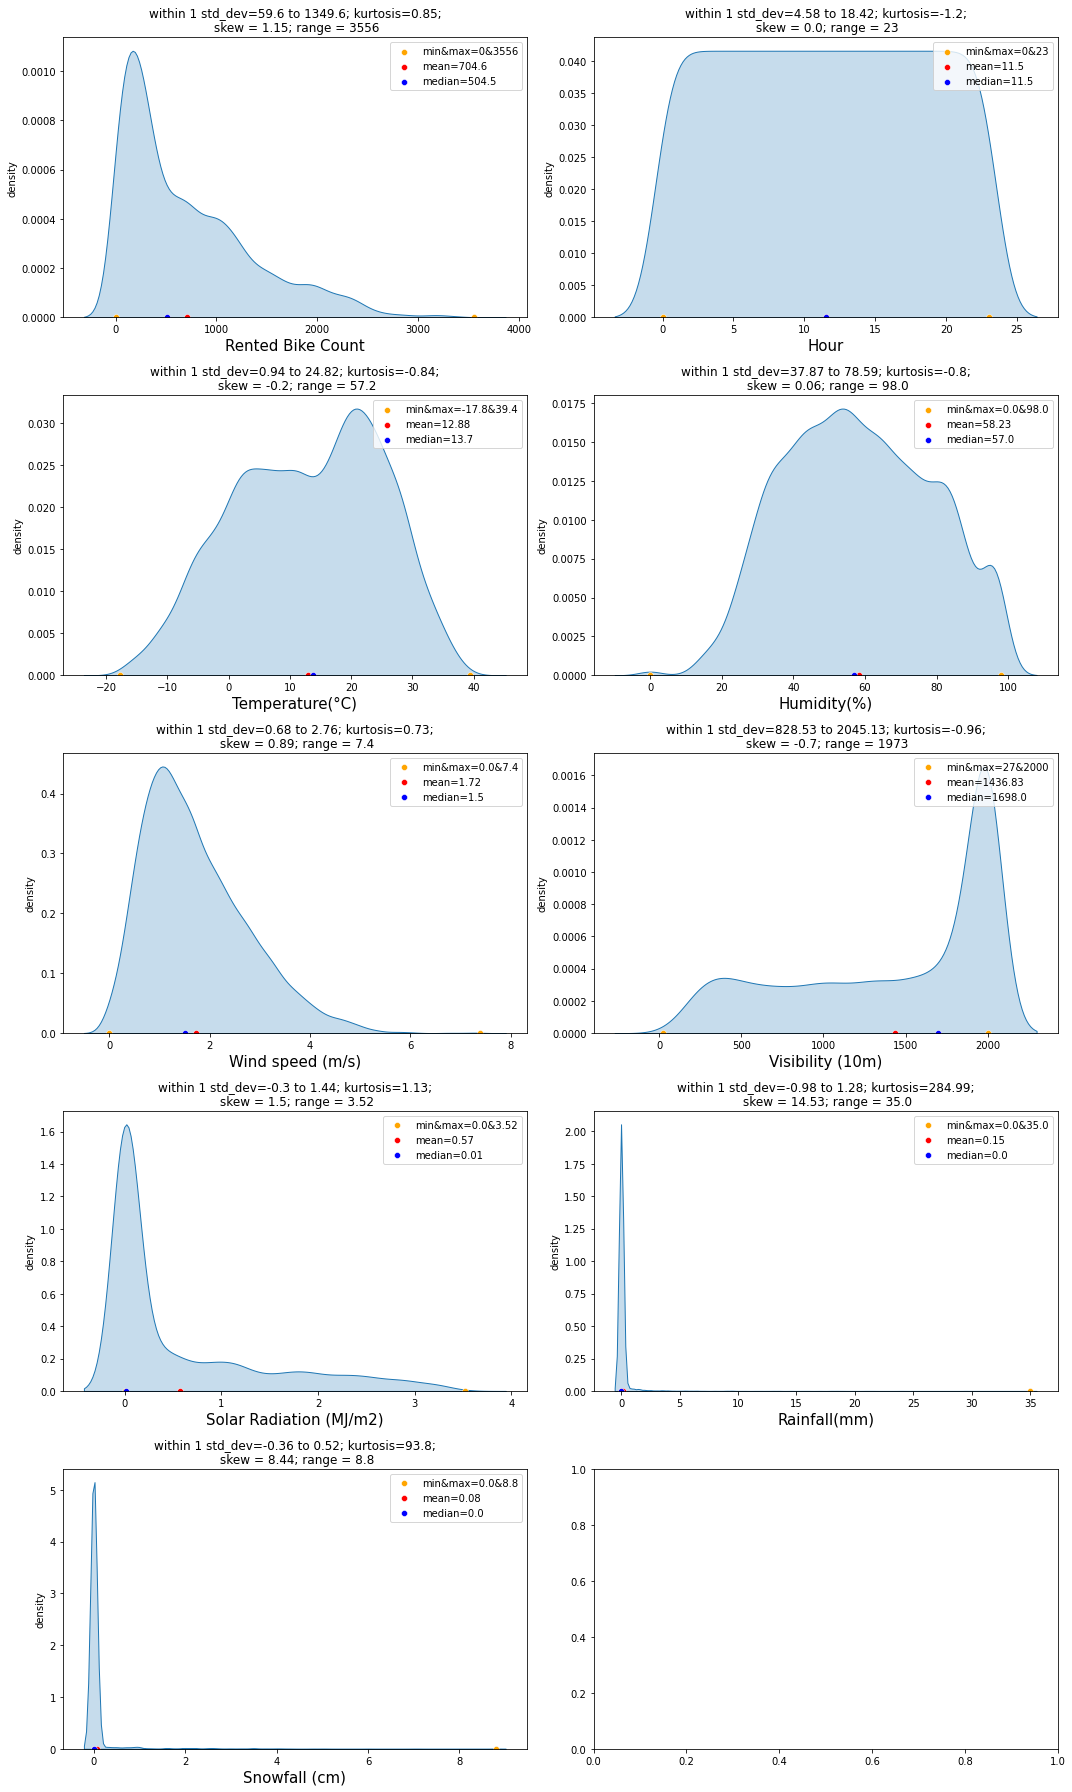

In [463]:
conti_plots(df,conti_data)

In [464]:
def box_plots(data, columns):
    num_cols = len(columns)
    num_rows = (num_cols + 1) // 2
    fig, axes = plt.subplots(num_rows, 2, figsize=(15, num_rows *3 ))

    for i, column in enumerate(columns):
        row = i // 2
        col = i % 2

        # Use axes[row, col] to select the appropriate subplot
        axes[row, col].set_title(f'{column}')
        sns.boxplot(x=data[column], ax=axes[row, col])

    plt.tight_layout()
    plt.show()

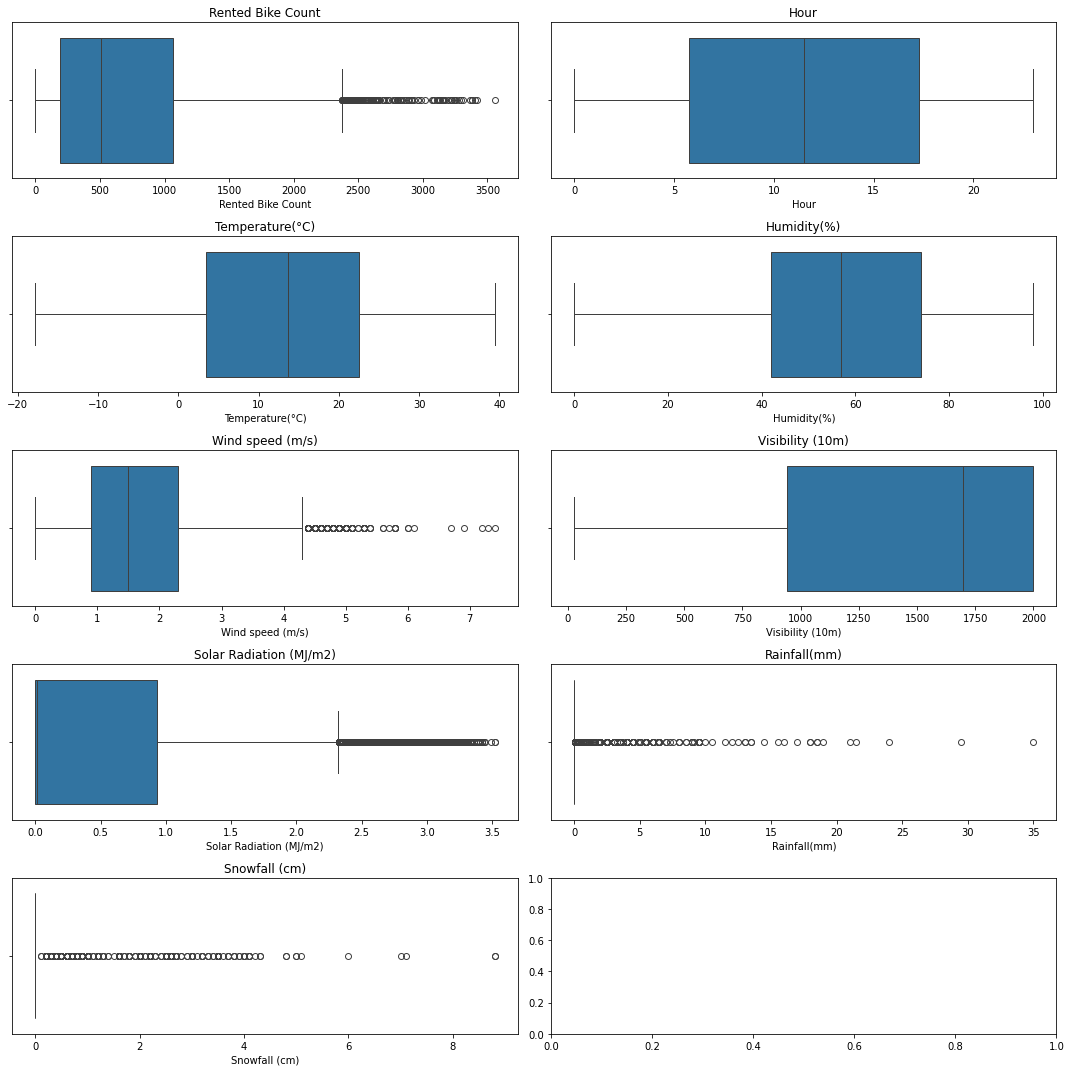

In [465]:
box_plots(df, conti_data)

In [466]:
import statsmodels.api as sm
def conti_qqplots(data, columns):
    num_cols = len(columns)
    num_rows = (num_cols + 1) // 2  # Ensure that there is at least one row
    fig, axes = plt.subplots(num_rows, 2, figsize=(15, num_rows * 5))  # Adjust figsize as needed

    for i, column in enumerate(columns):
        row = i // 2
        col = i % 2


        # Use axes[row, col] to select the appropriate subplot
        axes[row, col].set_title(f'{column}')
        sm.qqplot(data=data[column], ax=axes[row, col],line='45')
    
        axes[row, col].set_xlabel(f'{column}', fontsize=15)
        axes[row, col].set_ylabel('density')
        
    plt.tight_layout()
    plt.show()

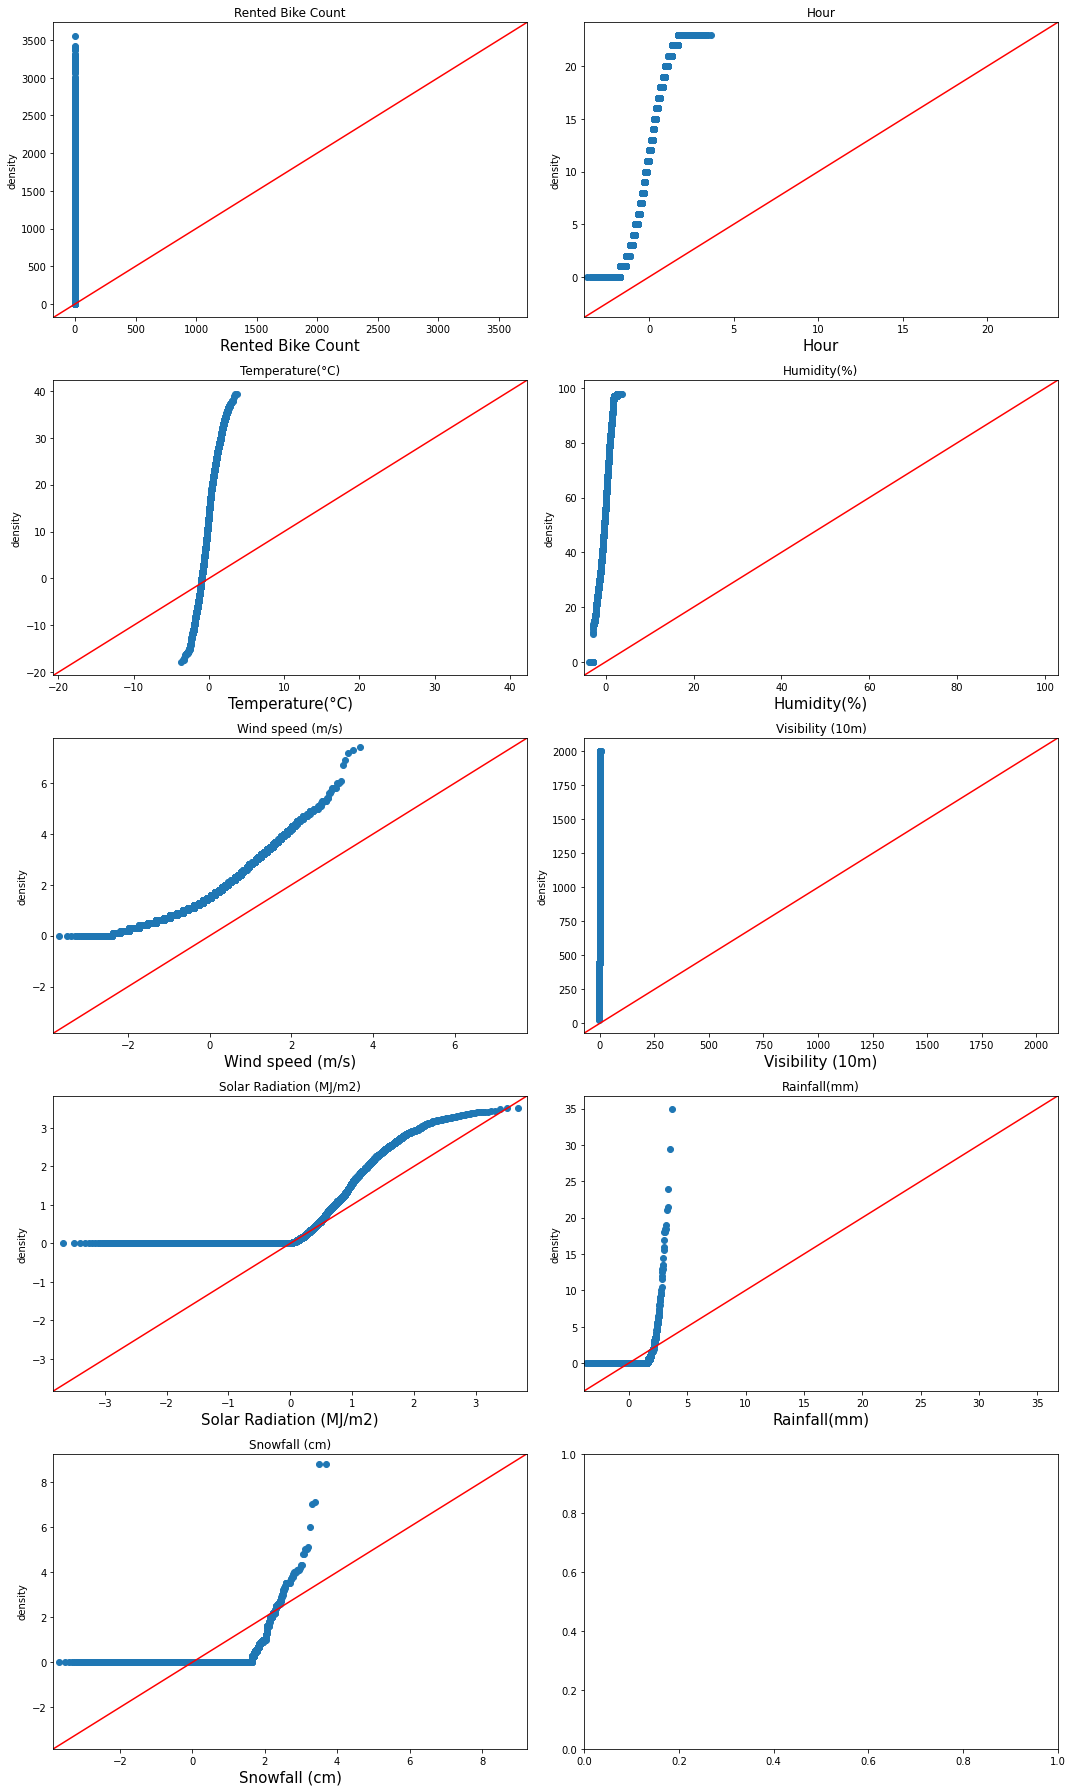

In [467]:
conti_qqplots(df, conti_data)

### Feature Transformation

In [468]:
from sklearn.preprocessing import PowerTransformer
sc_X=PowerTransformer(method = 'yeo-johnson')
df[conti_data]=sc_X.fit_transform(df[conti_data])

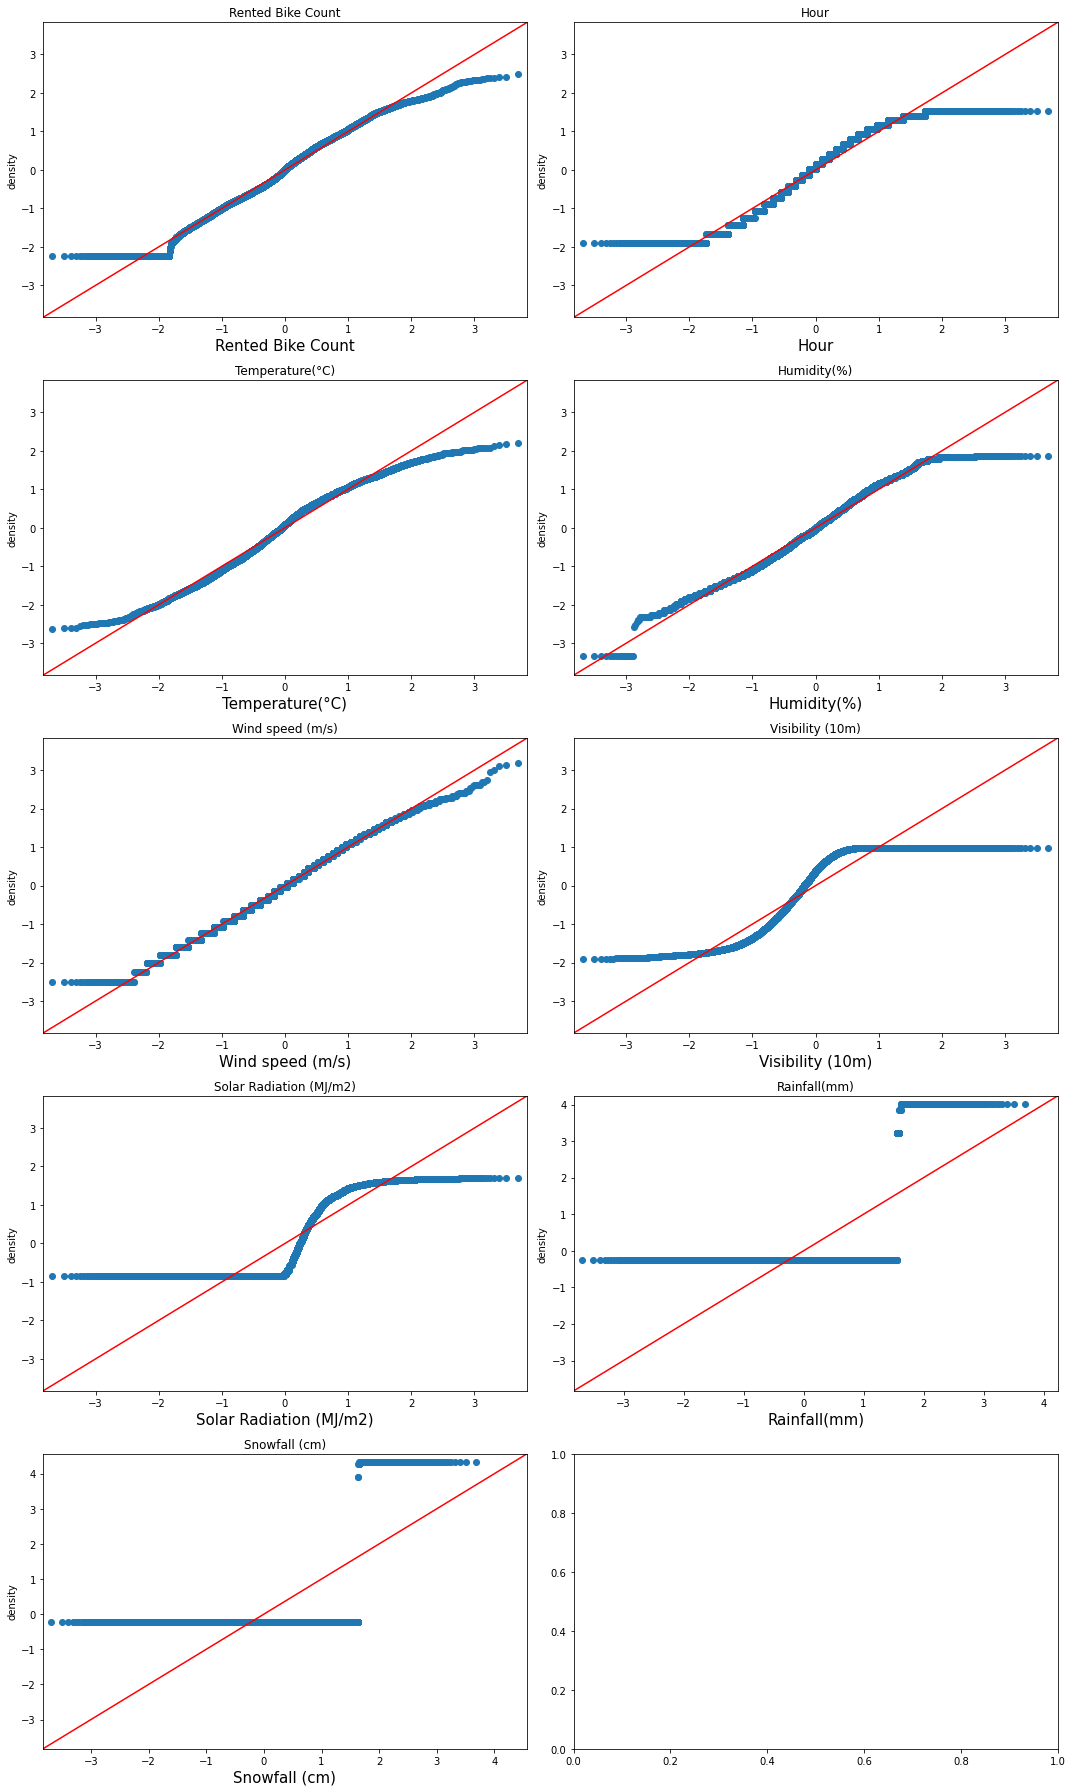

In [469]:
conti_qqplots(df, conti_data)

### Feature Encoding

In [470]:
df['Holiday'] = df['Holiday'].map({'No Holiday': 0, 'Holiday': 1})
df['Functioning Day'] = df['Functioning Day'].map({'No': 0, 'Yes': 1})

In [471]:
df1 = pd.get_dummies(data=df, columns=['Seasons'], drop_first=True)

In [472]:
df1.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Functioning Day,year,month,day,Seasons_Spring,Seasons_Summer,Seasons_Winter
0,-0.530004,-1.902967,-1.524521,-1.038829,0.618103,0.978214,-0.845761,-0.252859,-0.230785,0,1,2017,1,3,False,False,True
1,-0.676497,-1.654871,-1.550870,-0.986482,-0.923651,0.978214,-0.845761,-0.252859,-0.230785,0,1,2017,1,3,False,False,True
2,-0.779424,-1.440263,-1.594819,-0.934363,-0.640327,0.978214,-0.845761,-0.252859,-0.230785,0,1,2017,1,3,False,False,True
3,-1.047379,-1.244866,-1.612409,-0.882465,-0.778203,0.978214,-0.845761,-0.252859,-0.230785,0,1,2017,1,3,False,False,True
4,-1.200315,-1.062616,-1.594819,-1.091410,0.700184,0.978214,-0.845761,-0.252859,-0.230785,0,1,2017,1,3,False,False,True


In [473]:
df1[['Seasons_Spring', 'Seasons_Summer', 'Seasons_Winter',]] = df1[['Seasons_Spring', 'Seasons_Summer', 'Seasons_Winter',]].astype(int)

In [474]:
X = df1.drop('Rented Bike Count',axis=1)
y = df1['Rented Bike Count']

In [475]:
from sklearn.model_selection import train_test_split

In [476]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Feature Scaling

In [477]:
from sklearn.preprocessing import StandardScaler

In [478]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Model Building 

In [479]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
#from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
#from sklearn.ensemble import BaggingRegressor
#from sklearn.ensemble import StackingRegressor

In [480]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score

def model_pred(model, X_train, y_train, X_test, y_test, cv=5):
    
    # Train the model on the training set
    model.fit(X_train, y_train)

    # Make predictions on the training and testing sets
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)

    # Calculate performance metrics on the training and testing sets
    rmse_test = np.sqrt(mean_squared_error(test_pred, y_test))
    train_r2 = r2_score(y_train, train_pred)
    test_r2 = r2_score(y_test, test_pred)

    # Perform cross-validation and calculate mean and std of MAE
    cv_mse_scores = cross_val_score(model, X_train, y_train, cv=cv)
    cv_accuracy = cv_mse_scores.mean()
    cv_std = cv_mse_scores.std()

    # Create a dictionary with the calculated metrics and titles
    results_dict = {
        'Model': str(model),
        'Training R-squared (R2)': round(train_r2,3),
        'Testing R-squared (R2)': round(test_r2,3),
        'Testing RMSE': round(rmse_test,3),
        'CV Accuracy': round(cv_accuracy,3),
        'CV Std': round(cv_std,3)
    }

   
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=y_test, y=test_pred)
    plt.title('Actual vs Predicted Values')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.grid(True)
    plt.show()
    return results_dict

### 1.Linear Regression model

In [481]:
lr = LinearRegression()

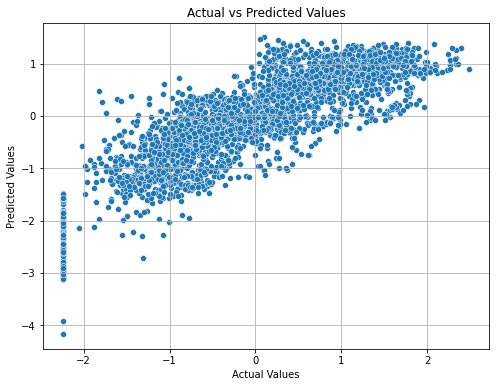

{'Model': 'LinearRegression()',
 'Training R-squared (R2)': 0.717,
 'Testing R-squared (R2)': 0.704,
 'Testing RMSE': 0.54,
 'CV Accuracy': 0.715,
 'CV Std': 0.01}

In [482]:
LR = model_pred(lr,X_train,y_train,X_test,y_test)
LR

### 2.KNN model

In [483]:
from sklearn.neighbors import KNeighborsRegressor
Knn = KNeighborsRegressor(n_neighbors=5)

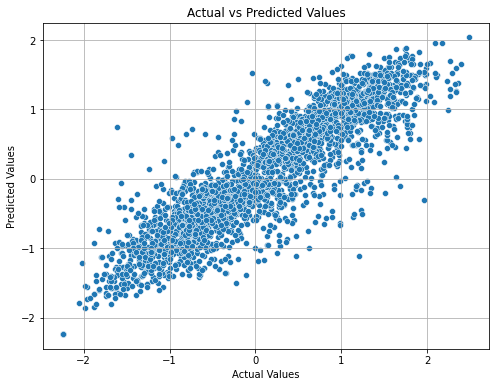

{'Model': 'KNeighborsRegressor()',
 'Training R-squared (R2)': 0.894,
 'Testing R-squared (R2)': 0.828,
 'Testing RMSE': 0.411,
 'CV Accuracy': 0.819,
 'CV Std': 0.016}

In [484]:
model_pred(Knn,X_train,y_train,X_test,y_test)

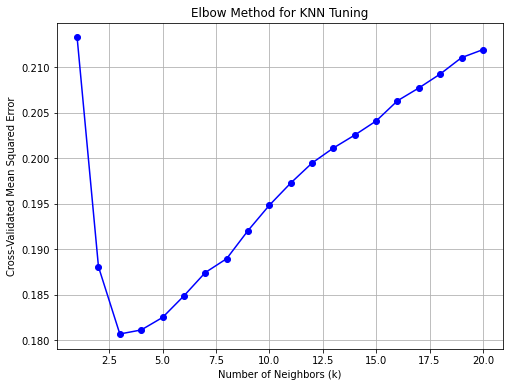

In [485]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score

k_values = np.arange(1, 21)

# List to store cross-validated mean squared errors for each k
cv_errors = []

# Perform cross-validation for each k
for k in k_values:
    knn_model = KNeighborsRegressor(n_neighbors=k)
    # Assuming 'scoring' is mean_squared_error, you can change it if needed
    scores = -cross_val_score(knn_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    cv_errors.append(np.mean(scores))

# Plot the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(k_values, cv_errors, marker='o', linestyle='-', color='b')
plt.title('Elbow Method for KNN Tuning')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Cross-Validated Mean Squared Error')
plt.grid(True)
plt.show()


In [486]:
Knn = KNeighborsRegressor(n_neighbors=3)

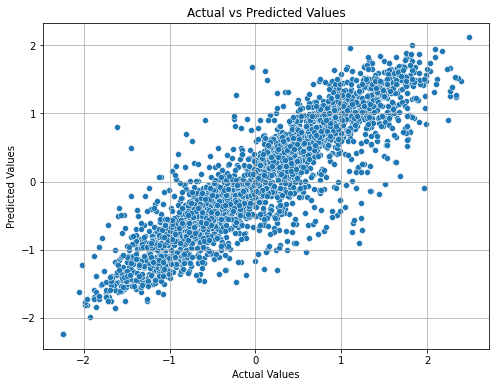

{'Model': 'KNeighborsRegressor(n_neighbors=3)',
 'Training R-squared (R2)': 0.927,
 'Testing R-squared (R2)': 0.831,
 'Testing RMSE': 0.407,
 'CV Accuracy': 0.82,
 'CV Std': 0.016}

In [487]:
KNN = model_pred(Knn,X_train,y_train,X_test,y_test)
KNN

### 3. Decision Tree 

In [488]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()

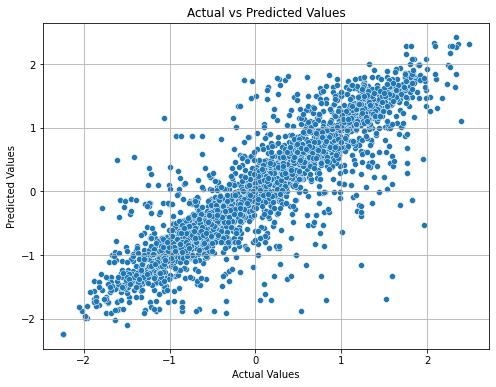

{'Model': 'DecisionTreeRegressor()',
 'Training R-squared (R2)': 1.0,
 'Testing R-squared (R2)': 0.816,
 'Testing RMSE': 0.425,
 'CV Accuracy': 0.825,
 'CV Std': 0.009}

In [489]:
DT = model_pred(dt,X_train,y_train,X_test,y_test)
DT

### 4. Random Forest

In [490]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

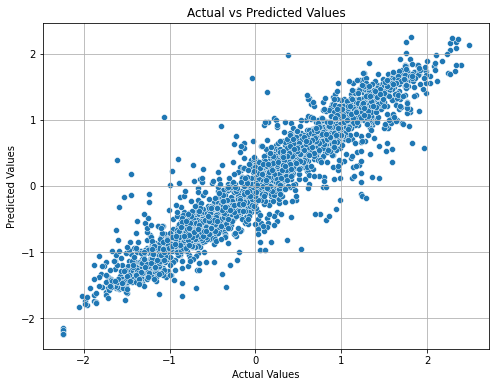

{'Model': 'RandomForestRegressor()',
 'Training R-squared (R2)': 0.989,
 'Testing R-squared (R2)': 0.915,
 'Testing RMSE': 0.289,
 'CV Accuracy': 0.914,
 'CV Std': 0.003}

In [491]:
RF = model_pred(rf,X_train,y_train,X_test,y_test)
RF

### 5. XGBoost Model

In [492]:
from xgboost import XGBRegressor

In [493]:
clf = XGBRegressor()

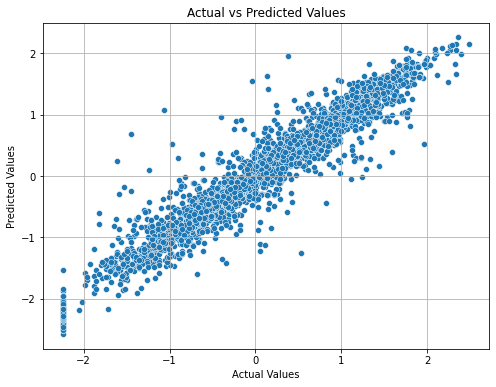

{'Model': 'XGBRegressor(base_score=None, booster=None, callbacks=None,\n             colsample_bylevel=None, colsample_bynode=None,\n             colsample_bytree=None, device=None, early_stopping_rounds=None,\n             enable_categorical=False, eval_metric=None, feature_types=None,\n             gamma=None, grow_policy=None, importance_type=None,\n             interaction_constraints=None, learning_rate=None, max_bin=None,\n             max_cat_threshold=None, max_cat_to_onehot=None,\n             max_delta_step=None, max_depth=None, max_leaves=None,\n             min_child_weight=None, missing=nan, monotone_constraints=None,\n             multi_strategy=None, n_estimators=None, n_jobs=None,\n             num_parallel_tree=None, random_state=None, ...)',
 'Training R-squared (R2)': 0.987,
 'Testing R-squared (R2)': 0.925,
 'Testing RMSE': 0.271,
 'CV Accuracy': 0.922,
 'CV Std': 0.005}

In [495]:
model_pred(clf,X_train,y_train,X_test,y_test)

### 6. Gradient Boost Model

In [496]:
from sklearn.ensemble import GradientBoostingRegressor

In [497]:
xg = GradientBoostingRegressor()

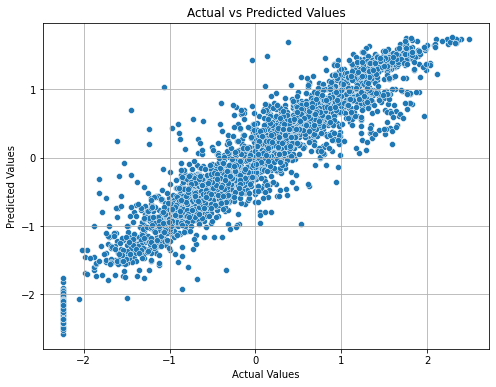

{'Model': 'GradientBoostingRegressor()',
 'Training R-squared (R2)': 0.9,
 'Testing R-squared (R2)': 0.881,
 'Testing RMSE': 0.342,
 'CV Accuracy': 0.888,
 'CV Std': 0.003}

In [498]:
GradientB = model_pred(xg,X_train,y_train,X_test,y_test)
GradientB

### Model Comparisons

In [501]:
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn import neighbors
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor
import xgboost as xgb

def model_evaluation(models, X_train, y_train, X_test, y_test, cv=5):
    results_list = []

    for name, model in models:
        # Train the model on the training set
        model.fit(X_train, y_train)

        # Make predictions on the training and testing sets
        train_pred = model.predict(X_train)
        test_pred = model.predict(X_test)

        # Calculate performance metrics on the training and testing sets
        rmse_test = np.sqrt(mean_squared_error(test_pred, y_test))
        train_r2 = r2_score(y_train, train_pred)
        test_r2 = r2_score(y_test, test_pred)

        # Perform cross-validation and calculate mean and std of MAE
        cv_mse_scores = cross_val_score(model, X_train, y_train, cv=cv)
        cv_accuracy = cv_mse_scores.mean()
        cv_std = cv_mse_scores.std()

        # Create a dictionary with the calculated metrics and titles
        results_dict = {
            'Model': str(model),
            'Training R-squared (R2)': round(train_r2,3),
            'Testing R-squared (R2)': round(test_r2,3),
            'Testing RMSE': round(rmse_test,3),
            'CV Accuracy': round(cv_accuracy,3),
            'CV Std': round(cv_std,3)
        }

        results_list.append(results_dict)
    # Convert the list of dictionaries to a DataFrame
    df_results = pd.DataFrame(results_list)

    return df_results

                        

In [502]:
models = [
    ['LinearRegression', LinearRegression()],
    ['Lasso', Lasso()],
    ['Ridge', Ridge()],
    ['KNeighborsRegressor', neighbors.KNeighborsRegressor()],
    ['SVR', SVR(kernel='rbf')],
    ['DecisionTree', DecisionTreeRegressor(random_state=42)],
    ['RandomForest', RandomForestRegressor(random_state=42)],
    ['ExtraTreesRegressor', ExtraTreesRegressor(random_state=42)],
    ['GradientBoostingRegressor', GradientBoostingRegressor(random_state=42)],
    ['XGBRegressor', xgb.XGBRegressor(random_state=42)],
]

# Assuming X_train, y_train, X_test, y_test are your training and testing data
results_df = model_evaluation(models, X_train, y_train, X_test, y_test, cv=5)

# Display the DataFrame with model performance
print(results_df)


                                               Model  Training R-squared (R2)  \
0                                 LinearRegression()                    0.717   
1                                            Lasso()                    0.000   
2                                            Ridge()                    0.717   
3                              KNeighborsRegressor()                    0.894   
4                                              SVR()                    0.871   
5             DecisionTreeRegressor(random_state=42)                    1.000   
6             RandomForestRegressor(random_state=42)                    0.989   
7               ExtraTreesRegressor(random_state=42)                    1.000   
8         GradientBoostingRegressor(random_state=42)                    0.900   
9  XGBRegressor(base_score=None, booster=None, ca...                    0.987   

   Testing R-squared (R2)  Testing RMSE  CV Accuracy  CV Std  
0                   0.704         0.540      

In [503]:
results_df

,Model,Training R-squared (R2),Testing R-squared (R2),Testing RMSE,CV Accuracy,CV Std
0,LinearRegression(),0.717,0.704,0.540,0.715,0.010
1,Lasso(),0.000,-0.000,0.991,-0.001,0.001
2,Ridge(),0.717,0.704,0.540,0.715,0.010
3,KNeighborsRegressor(),0.894,0.828,0.411,0.819,0.016
4,SVR(),0.871,0.842,0.394,0.847,0.009
5,DecisionTreeRegressor(random_state=42),1.000,0.813,0.429,0.826,0.011
6,RandomForestRegressor(random_state=42),0.989,0.915,0.289,0.915,0.003
7,ExtraTreesRegressor(random_state=42),1.000,0.931,0.261,0.924,0.006
8,GradientBoostingRegressor(random_state=42),0.900,0.881,0.342,0.888,0.003
9,"XGBRegressor(base_score=None, booster=None, ca...",0.987,0.925,0.271,0.922,0.005


### Hyper Parameter Tunning 